In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers. normalization import BatchNormalization
from time import time

Using TensorFlow backend.


In [2]:
num_classes = 2

labels = [
    'ham',
    'spam'
]

In [3]:
from PIL import Image
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DATA_PATH = '/mnt/store/spam-data'
TRAIN_DIR = DATA_PATH + '/train'
TEST_DIR = DATA_PATH + '/test'

# Want to know how we should format the height x width image data dimensions
# for inputting to a keras model
def get_size_statistics():
    heights = []
    widths = []
    img_count = 0
    for l in labels:
        DIR = TRAIN_DIR+'/'+l
        for img in os.listdir(DIR):
            if os.path.splitext(img)[1] in ['.jpeg', '.gif', '.jpg']:
                path = os.path.join(DIR, img)
                data = np.array(Image.open(path))
                heights.append(data.shape[0])
                widths.append(data.shape[1])
                img_count += 1
    avg_height = sum(heights) / len(heights)
    avg_width = sum(widths) / len(widths)
    print("Average Height: " + str(avg_height))
    print("Max Height: " + str(max(heights)))
    print("Min Height: " + str(min(heights)))
    print('\n')
    print("Average Width: " + str(avg_width))
    print("Max Width: " + str(max(widths)))
    print("Min Width: " + str(min(widths)))
    print("Count: "+ str(img_count))

get_size_statistics() 

Average Height: 594.1209081309398
Max Height: 1440
Min Height: 25


Average Width: 621.7565997888067
Max Width: 1919
Min Width: 24
Count: 1894


In [4]:
def label_img(DIR, name):
    if 'spam' in DIR: return np.array([1, 0])
    elif 'ham' in DIR : return np.array([0, 1])

In [5]:

IMG_SIZE = 300

def load_training_data():
    train_data = []
    for l in labels:
        DIR = TRAIN_DIR+'/'+l
        for img in os.listdir(DIR):
            label = label_img(DIR, img)
            path = os.path.join(DIR, img)
            if os.path.splitext(img)[1] in ['.jpeg', '.gif', '.jpg']:
                img = Image.open(path)
                img = img.convert('L')
                img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

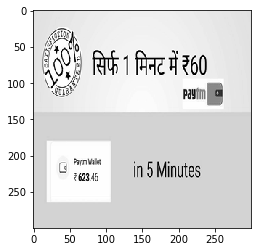

In [6]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [7]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [8]:

IMG_SIZE = 300

def load_test_data():
    test_data = []
    for l in labels:
        DIR = TEST_DIR+'/'+l
        for img in os.listdir(DIR):
            label = label_img(DIR, img)
            path = os.path.join(DIR, img)
            if os.path.splitext(img)[1] in ['.jpeg', '.gif', '.jpg']:
                img = Image.open(path)
                img = img.convert('L')
                img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
                test_data.append([np.array(img), label])
            
    shuffle(test_data)
    return test_data

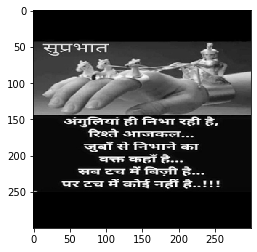

In [9]:
test_data = load_test_data()
plt.imshow(test_data[43][0], cmap = 'gist_gray')

In [10]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [13]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 50, verbose = 1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1894/1894 [==============================] - 25s 13ms/step - loss: 0.0248 - acc: 0.9910
Epoch 2/50
1894/1894 [==============================] - 21s 11ms/step - loss: 1.9673e-07 - acc: 1.0000
Epoch 3/50
1894/1894 [==============================] - 21s 11ms/step - loss: 2.1277e-07 - acc: 1.0000
Epoch 4/50
1894/1894 [==============================] - 21s 11ms/step - loss: 1.8663e-07 - acc: 1.0000
Epoch 5/50
1894/1894 [==============================] - 22s 11ms/step - loss: 1.9662e-07 - acc: 1.0000
Epoch 6/50
1894/1894 [==============================] - 21s 11ms/step - loss: 1.4555e-07 - acc: 1.0000
Epoch 7/50
1894/1894 [==============================] - 22s 11ms/step - loss: 1.4607e-07 - acc: 1.0000
Epoch 8/50
1894/1894 [==============================] - 21s 11ms/step - loss: 2.1905e-07 - acc: 1.0000
Epoch 9/50
1894/1894 [==============================] - 21s 11ms/step - loss: 1.6543e-07 - acc: 1.0000
Epoch 10/50
1894/1894 [======

In [14]:

loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)

100.0
